In [1]:
#!/usr/bin/python
import os, sys
import tensorflow as tf
import numpy as np
import pandas as pd

AUTOTUNE = tf.data.experimental.AUTOTUNE

'/home/kyungha'

In [3]:
def one_hot_encoder(s):
    seq_num = ' '.join([str(ints) for ints in range(4)])
    seq_ref = 'A T C G'
    d = dict(zip(seq_ref.split(' '), seq_num.split(' ')))
    
    x = np.zeros((len(d), len(s)))
    x[[int(d[c]) for c in s], range(len(s))] = 1
    return x

In [4]:
folder_path = sys.path[0]
train_seq = pd.read_csv('{}/Seq_with_freq_train.csv'.format(folder_path), sep = ",")
test_seq = pd.read_csv('{}/Seq_with_freq_test.csv'.format(folder_path), sep = ",")

In [5]:
#Top or bottom 2,000 sequences

train_top = train_seq.sort_values(by = ["indel_freq"], axis = 0, ascending = False)
train_bot = train_seq.sort_values(by = ["indel_freq"], axis = 0, ascending = True)
top_2000 = train_top.head(2000)
bot_2000 = train_bot.head(2000)

In [6]:
def diff_class(df):
    freq = df["indel_freq"]
    if freq >= 43.512:
        return 1
    else:
        return 0

In [7]:
top_2000["class"] = top_2000.apply(diff_class, axis = 1)
bot_2000["class"] = bot_2000.apply(diff_class, axis = 1)

/home/kyungha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/kyungha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
test_seq["class"] = test_seq.apply(diff_class, axis = 1)

In [9]:
total_4000 = pd.concat([top_2000, bot_2000], axis = 0)
total_4000.shape

(12000, 3)

In [10]:
#Sequences to One-hot encoding vector for CNN
seq = total_4000['#bseq'].tolist()
seq_class = total_4000['class'].tolist()
X_seq = [one_hot_encoder(x) for x in seq]
X_seq = np.transpose(np.asarray(X_seq), (0, 2, 1))
X_seq = X_seq.astype('float32')
Y_class = np.array(seq_class)

In [11]:
print('Length of data:', X_seq.shape[0])
print('Length of nucleic acids:', X_seq.shape[1])
print('Type of nucleic acids:', X_seq.shape[2])

Length of data: 12000
Length of nucleic acids: 30
Type of nucleic acids: 4


In [1]:
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve,average_precision_score, confusion_matrix, f1_score,matthews_corrcoef
from inspect import signature
import seaborn as sns

In [13]:
#Model path

current_path = os.getcwd()
model_path = os.path.join(current_path,'models')
model_path = os.path.join(model_path,'Classification_30seq')
os.makedirs(model_path, exist_ok = True)
print(model_path)

/home/kyungha/Downloads/CINDELA_prediction/DeepSpCas9/models/Model_classification_30seq


In [14]:
#Hyperparameter

BATCH_SIZE = 8
SEQ_length = 30
BASE_type  = 4
CLASS_NAMES = ['enriched','not-enriched']
params = [['CONV', 400, 3, 1],
          ['DROP', 0.5],
          ['POOL', 2, 1],
          ['FLAT'],
          ['DENSE', 50]]
activation_func = 'relu'
regularizer_params = None

In [15]:
model_version = 1
dict_history = {}
steps_per_epoch = 450
Epochs = 50

Epoch 1/50
450/450 - 4s - loss: 0.6331 - acc: 0.6469 - val_loss: 0.5992 - val_acc: 0.7092 - 4s/epoch - 8ms/step
Epoch 2/50
450/450 - 3s - loss: 0.5641 - acc: 0.7175 - val_loss: 0.5666 - val_acc: 0.7142 - 3s/epoch - 6ms/step
Epoch 3/50
450/450 - 2s - loss: 0.5334 - acc: 0.7369 - val_loss: 0.5437 - val_acc: 0.7358 - 2s/epoch - 6ms/step
Epoch 4/50
450/450 - 3s - loss: 0.5036 - acc: 0.7617 - val_loss: 0.5196 - val_acc: 0.7533 - 3s/epoch - 7ms/step
Epoch 5/50
450/450 - 3s - loss: 0.4891 - acc: 0.7614 - val_loss: 0.5026 - val_acc: 0.7667 - 3s/epoch - 7ms/step
Epoch 6/50
450/450 - 3s - loss: 0.4823 - acc: 0.7664 - val_loss: 0.5013 - val_acc: 0.7625 - 3s/epoch - 7ms/step
Epoch 7/50
450/450 - 3s - loss: 0.4684 - acc: 0.7761 - val_loss: 0.5646 - val_acc: 0.7208 - 3s/epoch - 7ms/step
Epoch 8/50
450/450 - 3s - loss: 0.4579 - acc: 0.7772 - val_loss: 0.5174 - val_acc: 0.7525 - 3s/epoch - 6ms/step
Epoch 9/50
450/450 - 2s - loss: 0.4597 - acc: 0.7794 - val_loss: 0.5079 - val_acc: 0.7608 - 2s/epoch - 5

INFO:tensorflow:Assets written to: /home/kyungha/Downloads/CINDELA_prediction/DeepSpCas9/models/Model_classification_30seq/model_fname_1/assets


INFO:tensorflow:Assets written to: /home/kyungha/Downloads/CINDELA_prediction/DeepSpCas9/models/Model_classification_30seq/model_fname_1/assets


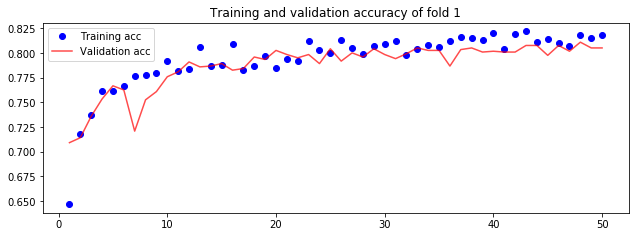

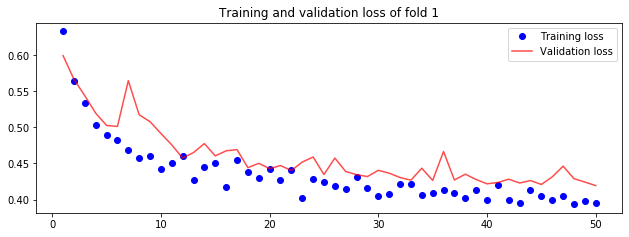

38/38 [==============================] - 0s 2ms/step


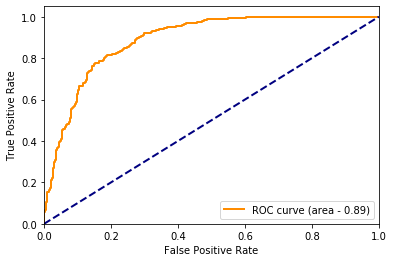

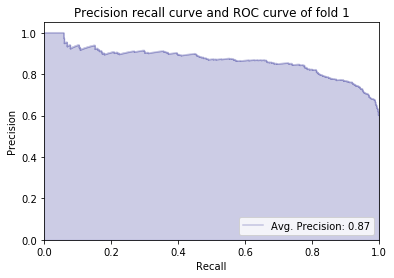

Epoch 1/50
450/450 - 3s - loss: 0.6327 - acc: 0.6489 - val_loss: 0.5927 - val_acc: 0.7117 - 3s/epoch - 7ms/step
Epoch 2/50
450/450 - 3s - loss: 0.5576 - acc: 0.7211 - val_loss: 0.5998 - val_acc: 0.6700 - 3s/epoch - 6ms/step
Epoch 3/50
450/450 - 3s - loss: 0.5260 - acc: 0.7358 - val_loss: 0.5209 - val_acc: 0.7358 - 3s/epoch - 6ms/step
Epoch 4/50
450/450 - 3s - loss: 0.5137 - acc: 0.7444 - val_loss: 0.5033 - val_acc: 0.7592 - 3s/epoch - 6ms/step
Epoch 5/50
450/450 - 3s - loss: 0.4775 - acc: 0.7756 - val_loss: 0.4875 - val_acc: 0.7675 - 3s/epoch - 6ms/step
Epoch 6/50
450/450 - 3s - loss: 0.4864 - acc: 0.7642 - val_loss: 0.4848 - val_acc: 0.7683 - 3s/epoch - 6ms/step
Epoch 7/50
450/450 - 3s - loss: 0.4767 - acc: 0.7681 - val_loss: 0.4694 - val_acc: 0.7833 - 3s/epoch - 6ms/step
Epoch 8/50
450/450 - 3s - loss: 0.4586 - acc: 0.7781 - val_loss: 0.4571 - val_acc: 0.7917 - 3s/epoch - 6ms/step
Epoch 9/50
450/450 - 3s - loss: 0.4587 - acc: 0.7817 - val_loss: 0.4560 - val_acc: 0.7900 - 3s/epoch - 6

INFO:tensorflow:Assets written to: /home/kyungha/Downloads/CINDELA_prediction/DeepSpCas9/models/Model_classification_30seq/model_fname_2/assets


INFO:tensorflow:Assets written to: /home/kyungha/Downloads/CINDELA_prediction/DeepSpCas9/models/Model_classification_30seq/model_fname_2/assets


<Figure size 432x288 with 0 Axes>

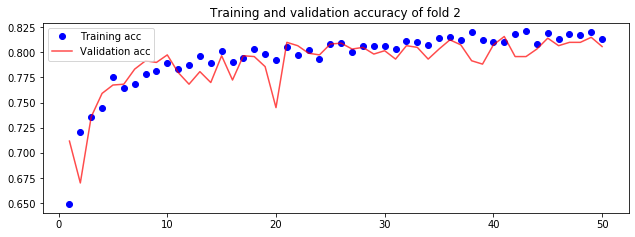

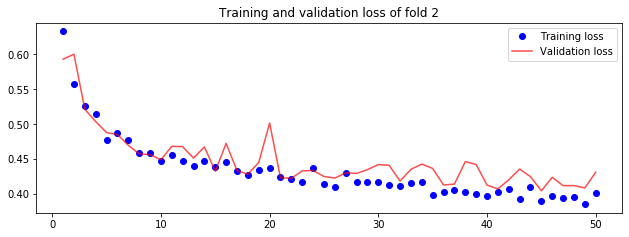

38/38 [==============================] - 0s 2ms/step


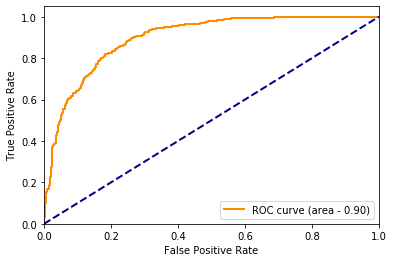

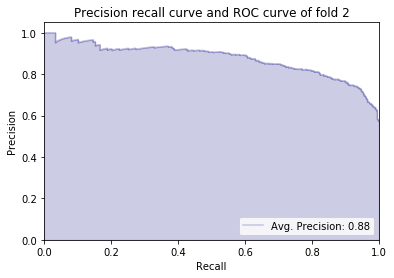

Epoch 1/50
450/450 - 3s - loss: 0.6316 - acc: 0.6522 - val_loss: 0.5915 - val_acc: 0.7150 - 3s/epoch - 8ms/step
Epoch 2/50
450/450 - 3s - loss: 0.5716 - acc: 0.7053 - val_loss: 0.5415 - val_acc: 0.7417 - 3s/epoch - 7ms/step
Epoch 3/50
450/450 - 3s - loss: 0.5284 - acc: 0.7356 - val_loss: 0.5320 - val_acc: 0.7392 - 3s/epoch - 7ms/step
Epoch 4/50
450/450 - 3s - loss: 0.5043 - acc: 0.7528 - val_loss: 0.4913 - val_acc: 0.7708 - 3s/epoch - 7ms/step
Epoch 5/50
450/450 - 3s - loss: 0.4932 - acc: 0.7606 - val_loss: 0.4853 - val_acc: 0.7808 - 3s/epoch - 8ms/step
Epoch 6/50
450/450 - 3s - loss: 0.4861 - acc: 0.7681 - val_loss: 0.4927 - val_acc: 0.7700 - 3s/epoch - 7ms/step
Epoch 7/50
450/450 - 3s - loss: 0.4773 - acc: 0.7681 - val_loss: 0.4669 - val_acc: 0.7767 - 3s/epoch - 7ms/step
Epoch 8/50
450/450 - 3s - loss: 0.4685 - acc: 0.7789 - val_loss: 0.4779 - val_acc: 0.7767 - 3s/epoch - 6ms/step
Epoch 9/50
450/450 - 3s - loss: 0.4612 - acc: 0.7858 - val_loss: 0.4514 - val_acc: 0.7975 - 3s/epoch - 6

INFO:tensorflow:Assets written to: /home/kyungha/Downloads/CINDELA_prediction/DeepSpCas9/models/Model_classification_30seq/model_fname_3/assets


INFO:tensorflow:Assets written to: /home/kyungha/Downloads/CINDELA_prediction/DeepSpCas9/models/Model_classification_30seq/model_fname_3/assets


<Figure size 432x288 with 0 Axes>

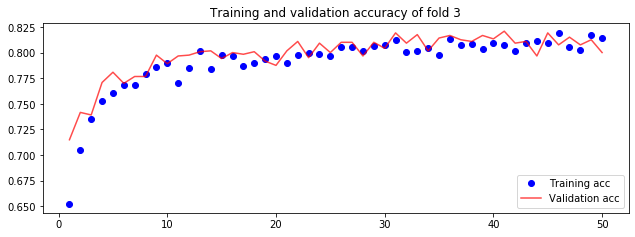

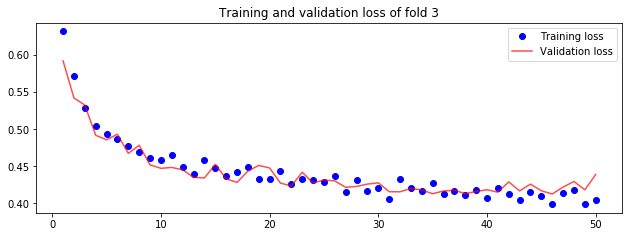

38/38 [==============================] - 0s 2ms/step


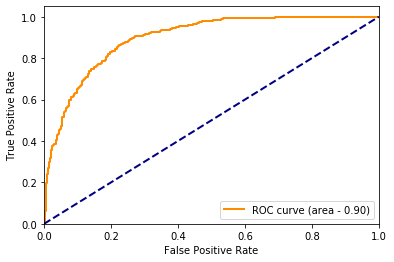

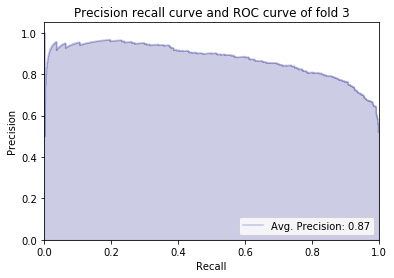

Epoch 1/50
450/450 - 4s - loss: 0.6258 - acc: 0.6556 - val_loss: 0.5960 - val_acc: 0.6992 - 4s/epoch - 8ms/step
Epoch 2/50
450/450 - 3s - loss: 0.5646 - acc: 0.7142 - val_loss: 0.5635 - val_acc: 0.7217 - 3s/epoch - 8ms/step
Epoch 3/50
450/450 - 3s - loss: 0.5322 - acc: 0.7297 - val_loss: 0.5374 - val_acc: 0.7433 - 3s/epoch - 6ms/step
Epoch 4/50
450/450 - 3s - loss: 0.5033 - acc: 0.7556 - val_loss: 0.5316 - val_acc: 0.7158 - 3s/epoch - 6ms/step
Epoch 5/50
450/450 - 3s - loss: 0.4869 - acc: 0.7700 - val_loss: 0.5491 - val_acc: 0.7200 - 3s/epoch - 6ms/step
Epoch 6/50
450/450 - 3s - loss: 0.4860 - acc: 0.7669 - val_loss: 0.5066 - val_acc: 0.7483 - 3s/epoch - 7ms/step
Epoch 7/50
450/450 - 4s - loss: 0.4626 - acc: 0.7792 - val_loss: 0.5141 - val_acc: 0.7383 - 4s/epoch - 9ms/step
Epoch 8/50
450/450 - 4s - loss: 0.4624 - acc: 0.7808 - val_loss: 0.4877 - val_acc: 0.7700 - 4s/epoch - 8ms/step
Epoch 9/50
450/450 - 3s - loss: 0.4577 - acc: 0.7778 - val_loss: 0.4927 - val_acc: 0.7658 - 3s/epoch - 6

INFO:tensorflow:Assets written to: /home/kyungha/Downloads/CINDELA_prediction/DeepSpCas9/models/Model_classification_30seq/model_fname_4/assets


INFO:tensorflow:Assets written to: /home/kyungha/Downloads/CINDELA_prediction/DeepSpCas9/models/Model_classification_30seq/model_fname_4/assets


<Figure size 432x288 with 0 Axes>

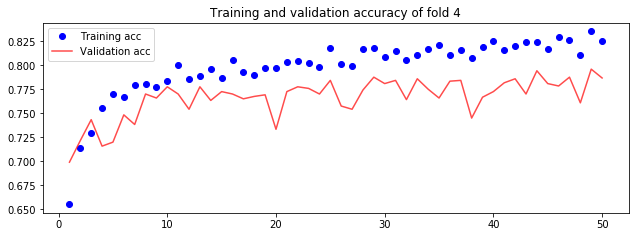

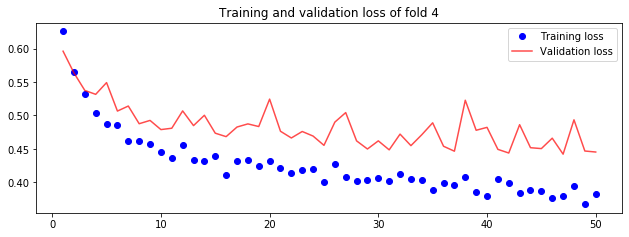

38/38 [==============================] - 0s 2ms/step


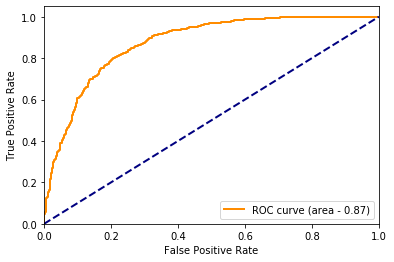

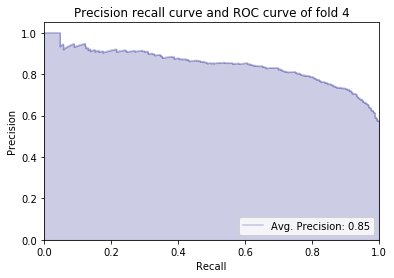

Epoch 1/50
450/450 - 3s - loss: 0.6230 - acc: 0.6631 - val_loss: 0.5789 - val_acc: 0.7167 - 3s/epoch - 7ms/step
Epoch 2/50
450/450 - 2s - loss: 0.5588 - acc: 0.7108 - val_loss: 0.5419 - val_acc: 0.7258 - 2s/epoch - 6ms/step
Epoch 3/50
450/450 - 2s - loss: 0.5210 - acc: 0.7419 - val_loss: 0.5283 - val_acc: 0.7458 - 2s/epoch - 6ms/step
Epoch 4/50
450/450 - 2s - loss: 0.4932 - acc: 0.7656 - val_loss: 0.5035 - val_acc: 0.7667 - 2s/epoch - 6ms/step
Epoch 5/50
450/450 - 2s - loss: 0.4836 - acc: 0.7653 - val_loss: 0.4906 - val_acc: 0.7683 - 2s/epoch - 5ms/step
Epoch 6/50
450/450 - 2s - loss: 0.4822 - acc: 0.7664 - val_loss: 0.4843 - val_acc: 0.7675 - 2s/epoch - 5ms/step
Epoch 7/50
450/450 - 2s - loss: 0.4606 - acc: 0.7678 - val_loss: 0.4778 - val_acc: 0.7783 - 2s/epoch - 6ms/step
Epoch 8/50
450/450 - 2s - loss: 0.4606 - acc: 0.7875 - val_loss: 0.4650 - val_acc: 0.7833 - 2s/epoch - 6ms/step
Epoch 9/50
450/450 - 3s - loss: 0.4608 - acc: 0.7747 - val_loss: 0.4833 - val_acc: 0.7667 - 3s/epoch - 6

INFO:tensorflow:Assets written to: /home/kyungha/Downloads/CINDELA_prediction/DeepSpCas9/models/Model_classification_30seq/model_fname_5/assets


INFO:tensorflow:Assets written to: /home/kyungha/Downloads/CINDELA_prediction/DeepSpCas9/models/Model_classification_30seq/model_fname_5/assets


<Figure size 432x288 with 0 Axes>

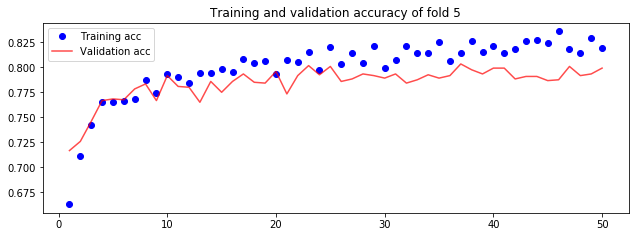

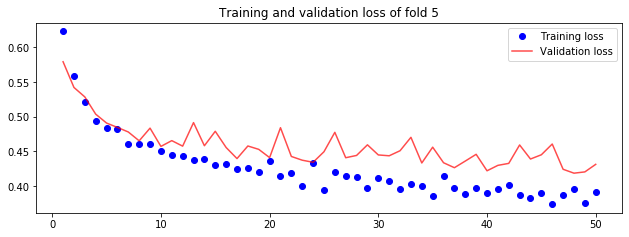

38/38 [==============================] - 0s 2ms/step


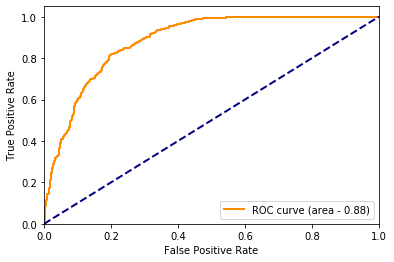

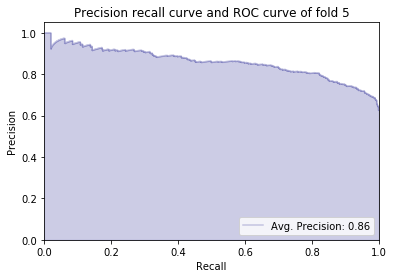

Epoch 1/50
450/450 - 4s - loss: 0.6446 - acc: 0.6261 - val_loss: 0.6081 - val_acc: 0.6667 - 4s/epoch - 9ms/step
Epoch 2/50
450/450 - 3s - loss: 0.5619 - acc: 0.7183 - val_loss: 0.5660 - val_acc: 0.7250 - 3s/epoch - 7ms/step
Epoch 3/50
450/450 - 3s - loss: 0.5238 - acc: 0.7428 - val_loss: 0.5257 - val_acc: 0.7417 - 3s/epoch - 6ms/step
Epoch 4/50
450/450 - 3s - loss: 0.5107 - acc: 0.7481 - val_loss: 0.5117 - val_acc: 0.7575 - 3s/epoch - 7ms/step
Epoch 5/50
450/450 - 3s - loss: 0.4765 - acc: 0.7700 - val_loss: 0.5000 - val_acc: 0.7700 - 3s/epoch - 6ms/step
Epoch 6/50
450/450 - 3s - loss: 0.4743 - acc: 0.7753 - val_loss: 0.4993 - val_acc: 0.7467 - 3s/epoch - 6ms/step
Epoch 7/50
450/450 - 3s - loss: 0.4645 - acc: 0.7781 - val_loss: 0.4855 - val_acc: 0.7658 - 3s/epoch - 6ms/step
Epoch 8/50
450/450 - 3s - loss: 0.4713 - acc: 0.7694 - val_loss: 0.4839 - val_acc: 0.7692 - 3s/epoch - 6ms/step
Epoch 9/50
450/450 - 2s - loss: 0.4473 - acc: 0.7894 - val_loss: 0.4773 - val_acc: 0.7800 - 2s/epoch - 6

INFO:tensorflow:Assets written to: /home/kyungha/Downloads/CINDELA_prediction/DeepSpCas9/models/Model_classification_30seq/model_fname_6/assets


INFO:tensorflow:Assets written to: /home/kyungha/Downloads/CINDELA_prediction/DeepSpCas9/models/Model_classification_30seq/model_fname_6/assets


<Figure size 432x288 with 0 Axes>

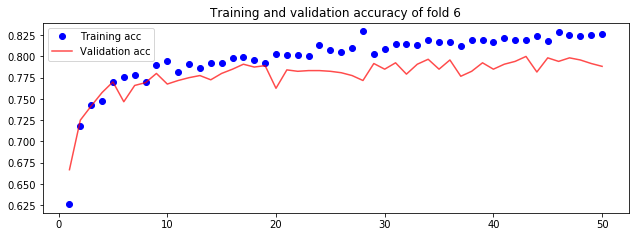

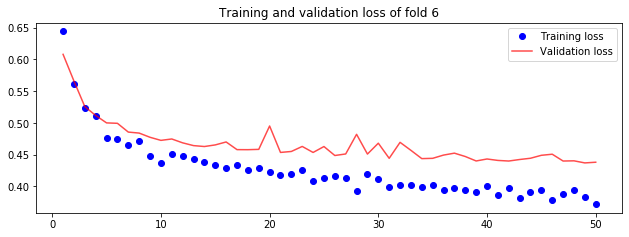

38/38 [==============================] - 0s 2ms/step


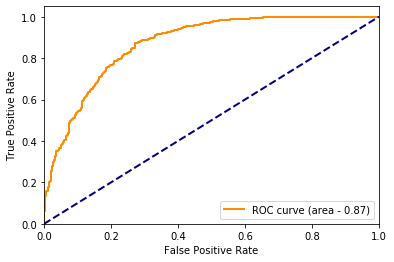

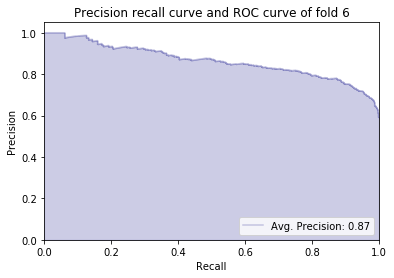

Epoch 1/50
450/450 - 3s - loss: 0.6152 - acc: 0.6664 - val_loss: 0.5911 - val_acc: 0.7042 - 3s/epoch - 7ms/step
Epoch 2/50
450/450 - 3s - loss: 0.5520 - acc: 0.7233 - val_loss: 0.5790 - val_acc: 0.7133 - 3s/epoch - 6ms/step
Epoch 3/50
450/450 - 3s - loss: 0.5221 - acc: 0.7392 - val_loss: 0.5335 - val_acc: 0.7492 - 3s/epoch - 7ms/step
Epoch 4/50
450/450 - 3s - loss: 0.4811 - acc: 0.7711 - val_loss: 0.5335 - val_acc: 0.7442 - 3s/epoch - 7ms/step
Epoch 5/50
450/450 - 3s - loss: 0.4785 - acc: 0.7697 - val_loss: 0.5118 - val_acc: 0.7533 - 3s/epoch - 7ms/step
Epoch 6/50
450/450 - 3s - loss: 0.4792 - acc: 0.7656 - val_loss: 0.5028 - val_acc: 0.7575 - 3s/epoch - 6ms/step
Epoch 7/50
450/450 - 3s - loss: 0.4484 - acc: 0.7917 - val_loss: 0.4992 - val_acc: 0.7483 - 3s/epoch - 7ms/step
Epoch 8/50
450/450 - 3s - loss: 0.4467 - acc: 0.7822 - val_loss: 0.5223 - val_acc: 0.7517 - 3s/epoch - 7ms/step
Epoch 9/50
450/450 - 3s - loss: 0.4656 - acc: 0.7800 - val_loss: 0.4937 - val_acc: 0.7592 - 3s/epoch - 7

INFO:tensorflow:Assets written to: /home/kyungha/Downloads/CINDELA_prediction/DeepSpCas9/models/Model_classification_30seq/model_fname_7/assets


INFO:tensorflow:Assets written to: /home/kyungha/Downloads/CINDELA_prediction/DeepSpCas9/models/Model_classification_30seq/model_fname_7/assets


<Figure size 432x288 with 0 Axes>

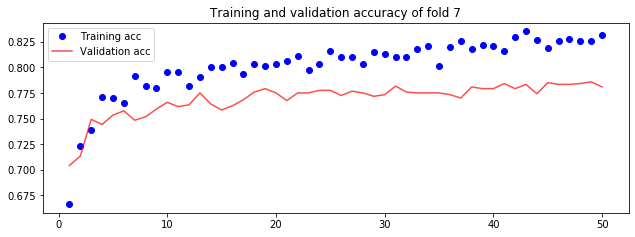

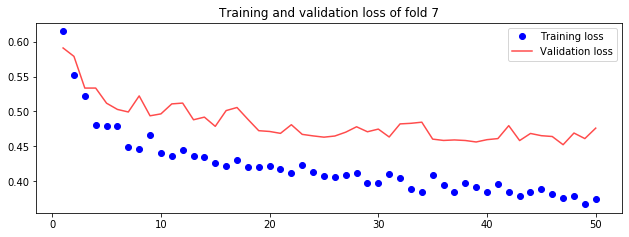

38/38 [==============================] - 0s 2ms/step


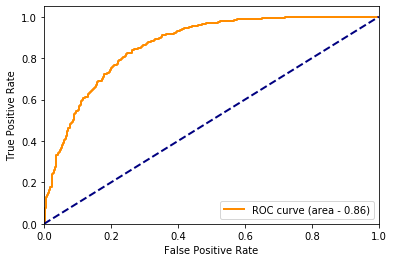

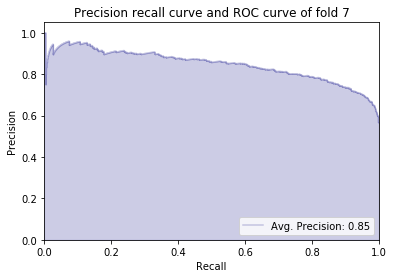

Epoch 1/50
450/450 - 3s - loss: 0.6177 - acc: 0.6619 - val_loss: 0.5938 - val_acc: 0.6708 - 3s/epoch - 7ms/step
Epoch 2/50
450/450 - 3s - loss: 0.5486 - acc: 0.7244 - val_loss: 0.5436 - val_acc: 0.7375 - 3s/epoch - 6ms/step
Epoch 3/50
450/450 - 3s - loss: 0.5228 - acc: 0.7419 - val_loss: 0.5270 - val_acc: 0.7533 - 3s/epoch - 6ms/step
Epoch 4/50
450/450 - 3s - loss: 0.4953 - acc: 0.7564 - val_loss: 0.4995 - val_acc: 0.7700 - 3s/epoch - 6ms/step
Epoch 5/50
450/450 - 3s - loss: 0.4707 - acc: 0.7731 - val_loss: 0.4888 - val_acc: 0.7667 - 3s/epoch - 6ms/step
Epoch 6/50
450/450 - 3s - loss: 0.4719 - acc: 0.7850 - val_loss: 0.4881 - val_acc: 0.7750 - 3s/epoch - 6ms/step
Epoch 7/50
450/450 - 3s - loss: 0.4653 - acc: 0.7744 - val_loss: 0.4966 - val_acc: 0.7692 - 3s/epoch - 6ms/step
Epoch 8/50
450/450 - 3s - loss: 0.4522 - acc: 0.7836 - val_loss: 0.4627 - val_acc: 0.7842 - 3s/epoch - 6ms/step
Epoch 9/50
450/450 - 3s - loss: 0.4525 - acc: 0.7878 - val_loss: 0.4742 - val_acc: 0.7800 - 3s/epoch - 6

INFO:tensorflow:Assets written to: /home/kyungha/Downloads/CINDELA_prediction/DeepSpCas9/models/Model_classification_30seq/model_fname_8/assets


INFO:tensorflow:Assets written to: /home/kyungha/Downloads/CINDELA_prediction/DeepSpCas9/models/Model_classification_30seq/model_fname_8/assets


<Figure size 432x288 with 0 Axes>

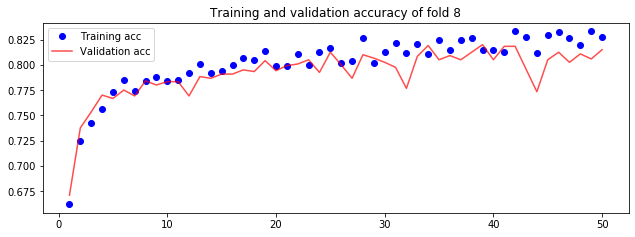

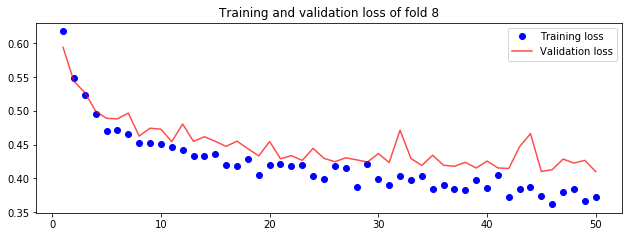

38/38 [==============================] - 0s 2ms/step


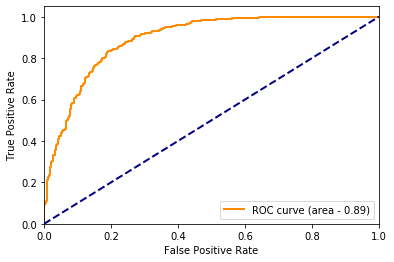

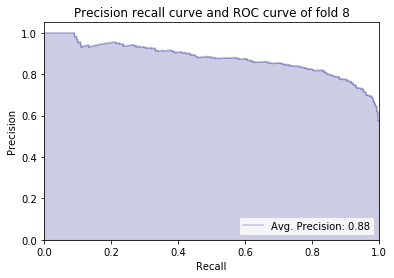

Epoch 1/50
450/450 - 3s - loss: 0.6271 - acc: 0.6456 - val_loss: 0.5693 - val_acc: 0.7200 - 3s/epoch - 6ms/step
Epoch 2/50
450/450 - 2s - loss: 0.5481 - acc: 0.7150 - val_loss: 0.5429 - val_acc: 0.7333 - 2s/epoch - 5ms/step
Epoch 3/50
450/450 - 2s - loss: 0.5124 - acc: 0.7497 - val_loss: 0.5025 - val_acc: 0.7742 - 2s/epoch - 6ms/step
Epoch 4/50
450/450 - 2s - loss: 0.4817 - acc: 0.7689 - val_loss: 0.4917 - val_acc: 0.7817 - 2s/epoch - 5ms/step
Epoch 5/50
450/450 - 2s - loss: 0.4856 - acc: 0.7614 - val_loss: 0.4734 - val_acc: 0.7717 - 2s/epoch - 5ms/step
Epoch 6/50
450/450 - 2s - loss: 0.4805 - acc: 0.7675 - val_loss: 0.4717 - val_acc: 0.7975 - 2s/epoch - 5ms/step
Epoch 7/50
450/450 - 2s - loss: 0.4590 - acc: 0.7814 - val_loss: 0.4646 - val_acc: 0.7958 - 2s/epoch - 5ms/step
Epoch 8/50
450/450 - 2s - loss: 0.4494 - acc: 0.7922 - val_loss: 0.4950 - val_acc: 0.7742 - 2s/epoch - 5ms/step
Epoch 9/50
450/450 - 2s - loss: 0.4649 - acc: 0.7772 - val_loss: 0.4451 - val_acc: 0.8000 - 2s/epoch - 5

INFO:tensorflow:Assets written to: /home/kyungha/Downloads/CINDELA_prediction/DeepSpCas9/models/Model_classification_30seq/model_fname_9/assets


INFO:tensorflow:Assets written to: /home/kyungha/Downloads/CINDELA_prediction/DeepSpCas9/models/Model_classification_30seq/model_fname_9/assets


<Figure size 432x288 with 0 Axes>

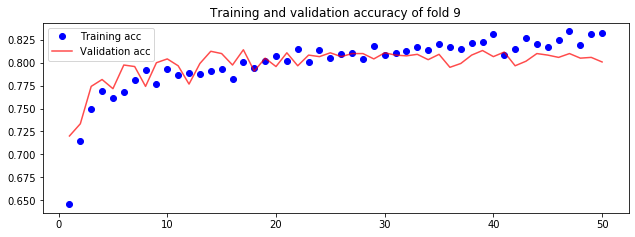

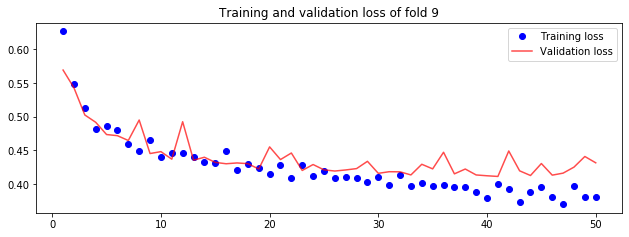

38/38 [==============================] - 0s 2ms/step


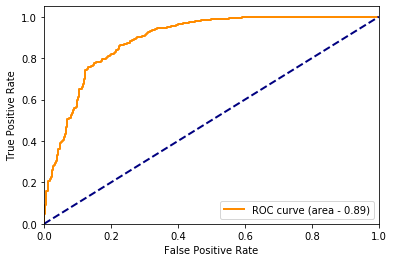

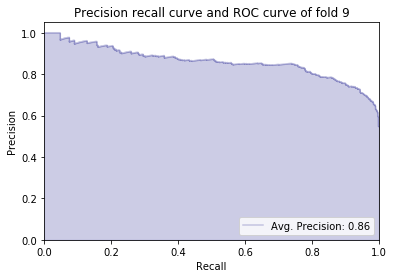

Epoch 1/50
450/450 - 3s - loss: 0.6304 - acc: 0.6467 - val_loss: 0.5698 - val_acc: 0.7283 - 3s/epoch - 6ms/step
Epoch 2/50
450/450 - 2s - loss: 0.5516 - acc: 0.7294 - val_loss: 0.5303 - val_acc: 0.7642 - 2s/epoch - 5ms/step
Epoch 3/50
450/450 - 2s - loss: 0.5281 - acc: 0.7333 - val_loss: 0.4974 - val_acc: 0.7750 - 2s/epoch - 5ms/step
Epoch 4/50
450/450 - 2s - loss: 0.4936 - acc: 0.7586 - val_loss: 0.4867 - val_acc: 0.7867 - 2s/epoch - 5ms/step
Epoch 5/50
450/450 - 2s - loss: 0.4873 - acc: 0.7617 - val_loss: 0.4674 - val_acc: 0.7933 - 2s/epoch - 5ms/step
Epoch 6/50
450/450 - 2s - loss: 0.4772 - acc: 0.7761 - val_loss: 0.4600 - val_acc: 0.8075 - 2s/epoch - 6ms/step
Epoch 7/50
450/450 - 2s - loss: 0.4636 - acc: 0.7775 - val_loss: 0.4835 - val_acc: 0.7775 - 2s/epoch - 5ms/step
Epoch 8/50
450/450 - 2s - loss: 0.4626 - acc: 0.7814 - val_loss: 0.4550 - val_acc: 0.7967 - 2s/epoch - 5ms/step
Epoch 9/50
450/450 - 2s - loss: 0.4632 - acc: 0.7742 - val_loss: 0.4642 - val_acc: 0.7867 - 2s/epoch - 5

INFO:tensorflow:Assets written to: /home/kyungha/Downloads/CINDELA_prediction/DeepSpCas9/models/Model_classification_30seq/model_fname_10/assets


INFO:tensorflow:Assets written to: /home/kyungha/Downloads/CINDELA_prediction/DeepSpCas9/models/Model_classification_30seq/model_fname_10/assets


<Figure size 432x288 with 0 Axes>

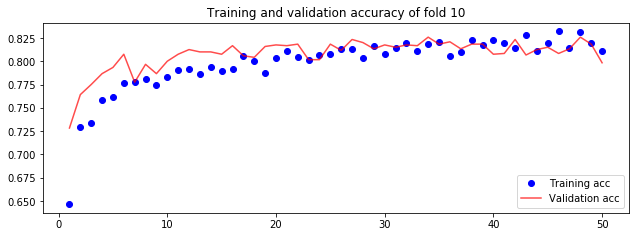

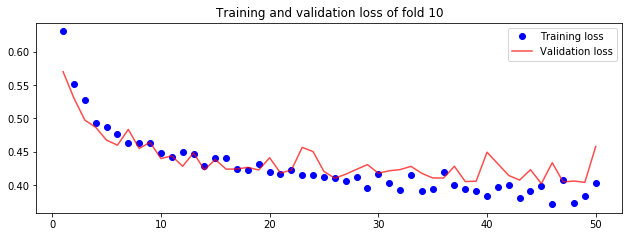

38/38 [==============================] - 0s 3ms/step


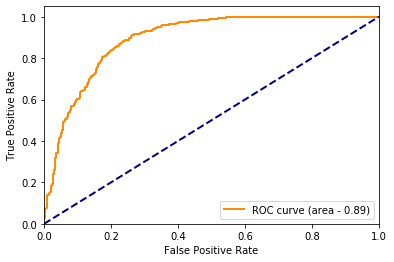

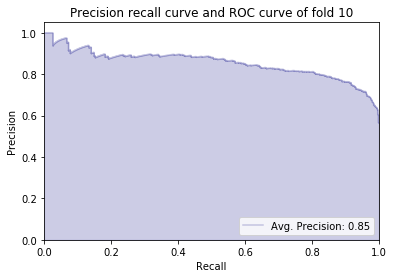

<Figure size 432x288 with 0 Axes>

In [16]:
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from tensorflow.keras import optimizers
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve,average_precision_score, confusion_matrix, f1_score,matthews_corrcoef
from inspect import signature
split_data = ShuffleSplit(n_splits = 10, train_size = None, test_size = 0.1, random_state=1)
acc_per_fold = []
loss_per_fold = []
val_acc_per_fold = []
val_loss_per_fold = []
roc_per_fold = []
roc_fpr = []
roc_tpr = []
precision_fold = []
recall_fold = []
ave_precision_fold = []
n_iter =0
fold_num = []
ave_acc = []
for train_idx, test_idx in split_data.split(X_seq, Y_class):
    X_train = np.array(X_seq[train_idx])
    X_test = np.array(X_seq[test_idx])
    y_train = np.array(Y_class[train_idx])
    y_test = np.array(Y_class[test_idx])
    model = models.Sequential()
    model.add(layers.Conv1D(filters = params[0][1],kernel_size = params[0][2],strides = params[0][3],activation=activation_func, input_shape=(SEQ_length, BASE_type),kernel_regularizer=regularizer_params, bias_regularizer=regularizer_params,padding='same'))
    model.add(layers.Dropout(rate = params[1][1])) #add noise
    model.add(layers.MaxPool1D(pool_size = params[2][1], strides = params[2][2]))
    model.add(layers.Flatten())
    model.add(layers.Dense(params[4][1], activation=activation_func, kernel_regularizer=regularizer_params,bias_regularizer=regularizer_params))
    model.add(layers.Dense(1, activation='sigmoid')) #'softmax' for N class
    model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.000075), metrics=['acc'] )
    dict_history[model_version] = model.fit(x=X_train,y=y_train,shuffle=True, steps_per_epoch=steps_per_epoch, epochs=Epochs, batch_size = BATCH_SIZE, validation_data=(X_test, y_test), verbose=2)
    history = dict_history[model_version]
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(f'Score for fold {n_iter+1}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%\n')
    ave_acc.append(scores[1])
    acc_per_fold.append(acc)
    loss_per_fold.append(loss)
    val_acc_per_fold.append(val_acc)
    val_loss_per_fold.append(val_loss)
    arr_acc = np.array(acc_per_fold)
    arr_loss = np.array(loss_per_fold)
    arr_val_acc = np.array(val_acc_per_fold)
    arr_val_loss = np.array(val_loss_per_fold)
    epochs = range(1, len(acc) + 1)
    pred = model.predict(x=X_test)
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    roc_fpr.append(fpr)
    roc_tpr.append(tpr)
    roc_auc = auc(fpr, tpr)
    roc_per_fold.append(roc_auc)
    precision, recall, thresholds = precision_recall_curve(y_test, pred)
    average_precision = average_precision_score(y_test, pred)
    precision_fold.append(precision)
    recall_fold.append(recall)
    ave_precision_fold.append(average_precision)
    globals()['model_fname_{}'.format(n_iter+1)] = f'BBBphagedisplay_TEST_{n_iter+1}_{model_version:03}.h5'
    model_spath = os.path.join(model_path,f'model_fname_{n_iter+1}')
    model.save(model_spath)
    fold_num.append(n_iter+1)
    epochs = range(1, len(acc) + 1)
    fig = plt.figure(figsize=(10.5,3.5))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'r', alpha=0.7, label='Validation acc')
    plt.title(f'Training and validation accuracy of fold {n_iter+1}')
    plt.legend()
    fig = plt.figure(figsize=(10.5,3.5))
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'r', alpha=0.7, label='Validation loss')
    plt.title(f'Training and validation loss of fold {n_iter+1}')
    plt.legend()
    plt.show()
    pred = model.predict(x=X_test)
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area - %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()
    plt.cla()
    plt.clf()
    precision, recall, thresholds = precision_recall_curve(y_test, pred)
    average_precision = average_precision_score(y_test, pred)
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='navy', alpha=0.2, where='post', label='Avg. Precision: {0:0.2f}'.format(average_precision))
    plt.fill_between(recall, precision, alpha=0.2, color='navy', **step_kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(loc='lower right')
    plt.title(f'Precision recall curve and ROC curve of fold {n_iter+1}')
    n_iter += 1
    plt.show()
    plt.cla()
    plt.clf()

In [18]:
np.average(arr_val_acc)

0.7871833362579346

In [19]:
#Model save
model_fname = f'Cas9Predictor_TEST_{model_version:03}.cv.h5'
model_spath = os.path.join(model_path, model_fname)
print(model_spath)

/home/kyungha/Downloads/CINDELA_prediction/DeepSpCas9/models/Model_classification_30seq/Cas9Predictor_TEST_001.cv.h5


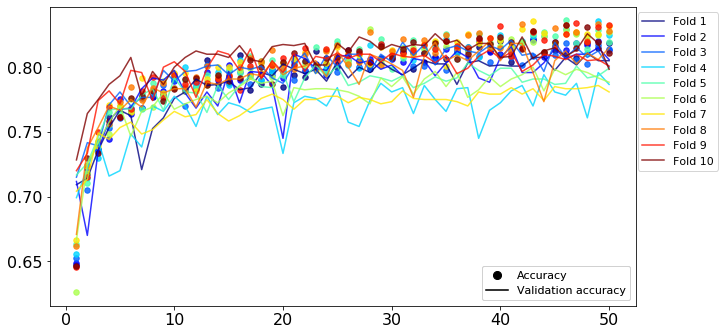

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler
import matplotlib.lines as mlines
num_plots = 10
n_iter = 0

plt.rcParams["font.size"] = 16
fig, ax = plt.subplots(figsize=(10.5,5.5))
ax.set_prop_cycle('color',[plt.cm.jet(i) for i in np.linspace(0, 1, num_plots)])
b_o = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=8)
b_line = mlines.Line2D([], [], color='black', linestyle='solid')
for i in range(n_iter, num_plots):
    plt.plot(epochs, arr_acc[i], 'o', markersize = 5.5, alpha= 0.8)
    i += 1
for i in range(n_iter, num_plots):
    plt.plot(epochs, arr_val_acc[i], alpha= 0.8, label= f'Fold {i+1}')
    i += 1
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), frameon = True, fontsize = 11)
art_legend = plt.gca().add_artist(legend)
legend_2 = plt.legend(handles = [b_o, b_line], labels = ['Accuracy', 'Validation accuracy'], loc='lower right', frameon = True, fontsize = 11)
art_legend_2 = plt.gca().add_artist(legend_2)

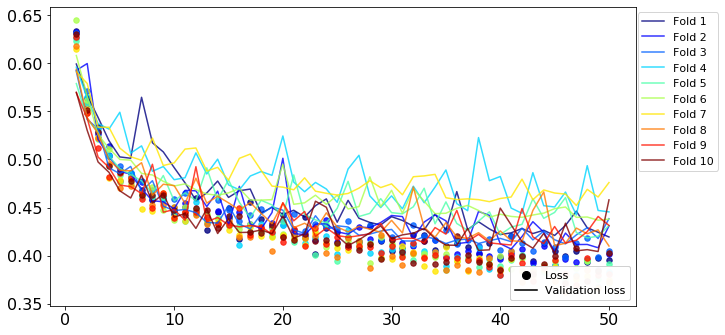

In [21]:
import matplotlib.pyplot as plt
import numpy as np
num_plots = 10
n_iter = 0

fig, ax = plt.subplots(figsize=(10.5,5.5))
ax.set_prop_cycle('color',[plt.cm.jet(i) for i in np.linspace(0, 1, num_plots)])
b_o = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=8)
b_line = mlines.Line2D([], [], color='black', linestyle='solid')
for i in range(n_iter, num_plots):
    plt.plot(epochs, arr_loss[i], 'o', markersize = 5.5, alpha= 0.8)
    i += 1
for i in range(n_iter, num_plots):
    plt.plot(epochs, arr_val_loss[i], alpha= 0.8, label= f'Fold {i+1}')
    i += 1
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), frameon = True, fontsize = 11)
art_legend = plt.gca().add_artist(legend)
legend_2 = plt.legend(handles = [b_o, b_line], labels = ['Loss', 'Validation loss'], loc='lower right', frameon = True, fontsize = 11)
art_legend_2 = plt.gca().add_artist(legend_2)

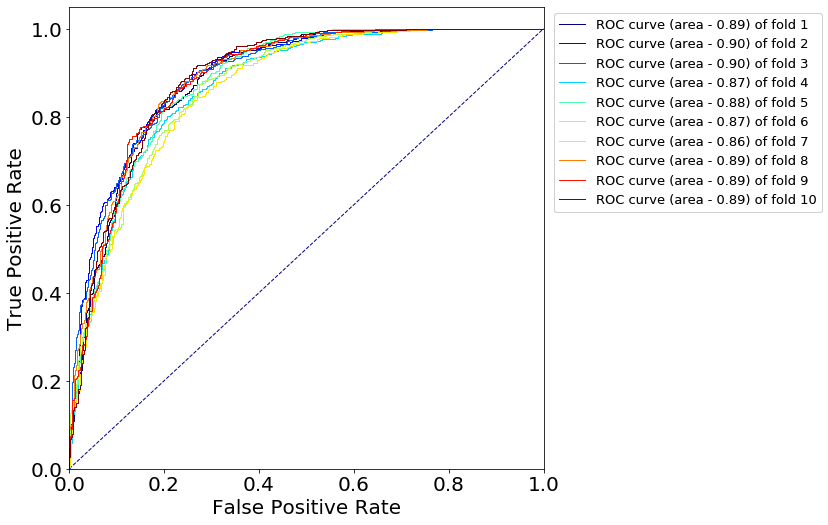

<Figure size 432x288 with 0 Axes>

In [22]:
num_plots = 10
n_iter = 0

fig, ax = plt.subplots(figsize=(8.5, 8.5))
ax.set_prop_cycle('color',[plt.cm.jet(i) for i in np.linspace(0, 1, num_plots)])
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
for i in range(n_iter, num_plots):
    plt.plot(roc_fpr[i], roc_tpr[i], linewidth=1, label=f'ROC curve (area - %0.2f) of fold {i+1}' % roc_per_fold[i])
    i += 1
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1), frameon = True, fontsize = 13)
art_legend = plt.gca().add_artist(legend)
plt.show()
plt.cla()
plt.clf()

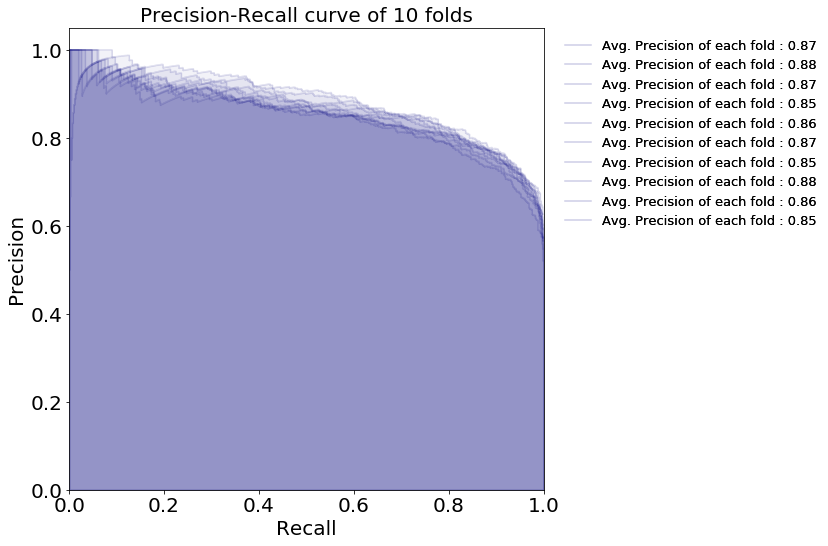

<Figure size 432x288 with 0 Axes>

In [23]:
num_plots = 10
n_iter = 0

fig, ax = plt.subplots(figsize=(8.5, 8.5))
ax.set_prop_cycle('color',[plt.cm.jet(i) for i in np.linspace(0, 1, num_plots)])
for i in range(n_iter, num_plots):
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall_fold[i], precision_fold[i], color='navy', alpha=0.1, where='post', label='Avg. Precision of each fold : {0:0.2f}'.format(ave_precision_fold[i]))
    plt.fill_between(recall_fold[i], precision_fold[i], alpha=0.05, color='navy', **step_kwargs)
    i += 1
plt.xlabel('Recall', fontsize = 20)
plt.ylabel('Precision', fontsize = 20)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1), frameon = False, fontsize = 13)
art_legend = plt.gca().add_artist(legend)
plt.title(f'Precision-Recall curve of {i} folds', fontsize = 20)
plt.show()
plt.cla()
plt.clf()

In [24]:
pred = model.predict(x=X_test)

38/38 [==============================] - 0s 3ms/step


In [25]:
#Test the model (Endogenous dataset : 542 sequences)
select_test = test_seq.sort_values(by = ["indel_freq"], axis = 0, ascending = False)
select_test_top = test_seq.head(271)
select_test_bot = test_seq.tail(271)

In [26]:
test_set = pd.concat([select_test_top, select_test_bot], axis = 0)
test_set["class"] = test_set.apply(diff_class, axis = 1)

(542, 3)

In [29]:
val_pep = test_set['#bseq'].tolist()
val_class = test_set['indel_freq'].tolist()
val_encode = [one_hot_encoder(x) for x in val_pep]
val_encode = np.transpose(np.asarray(val_encode), (0, 2, 1))

In [30]:
#Insert best model number to "num" from 10 cross-validated model
model_fit = keras.models.load_model("{}/model_fname_num".format(model_path))
val_score = model_fit.predict(val_encode)
val_score_flat = val_score.flatten()
model_fit.fit(val_encode, val_score_flat)

17/17 [==============================] - 0s 3ms/step


In [31]:
model_fit.fit(val_encode, val_score_flat)

17/17 [==============================] - 1s 13ms/step - loss: 0.4891 - acc: 0.0000e+00


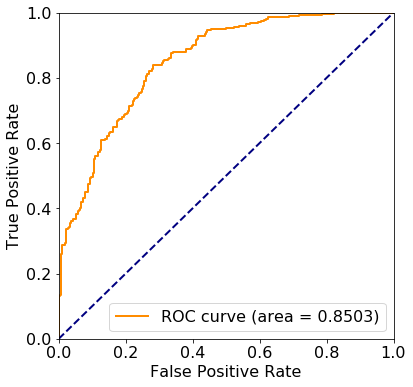

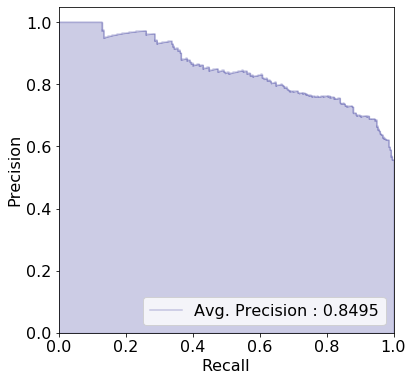

<Figure size 432x432 with 0 Axes>

In [33]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve,average_precision_score, confusion_matrix, f1_score,matthews_corrcoef
from inspect import signature

plt.rcParams["figure.figsize"] = (6, 6) 
plt.rcParams["font.size"] = 16
fpr, tpr, thresholds = roc_curve(val_class, val_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
plt.cla()
plt.clf()

precision, recall, thresholds = precision_recall_curve(
    val_class, val_score
)
average_precision = average_precision_score(val_class, val_score)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='navy', alpha=0.2, where='post',
         label='Avg. Precision : {0:0.4f}'.format(average_precision))
plt.fill_between(recall, precision, alpha=0.2, color='navy', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.show()
plt.cla()
plt.clf()